In [1]:
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from matplotlib import ticker

In [3]:
vectors = np.array([[1, 0, 1], [0, 1, 5], [1, 1, 2]])

In [4]:
Y = vectors[:, 2]
Y_I = np.delete(vectors, 2, axis=1)
F = Y_I.T @ Y_I
F_inv = np.linalg.inv(F)
B = F_inv @ Y_I.T @ Y

In [5]:
B

array([-0.33333333,  3.66666667])

$$\omega = -0.33\xi + 3.67\eta$$

## Ridge регуляризация

0.96 [0.24221811 2.28303441]


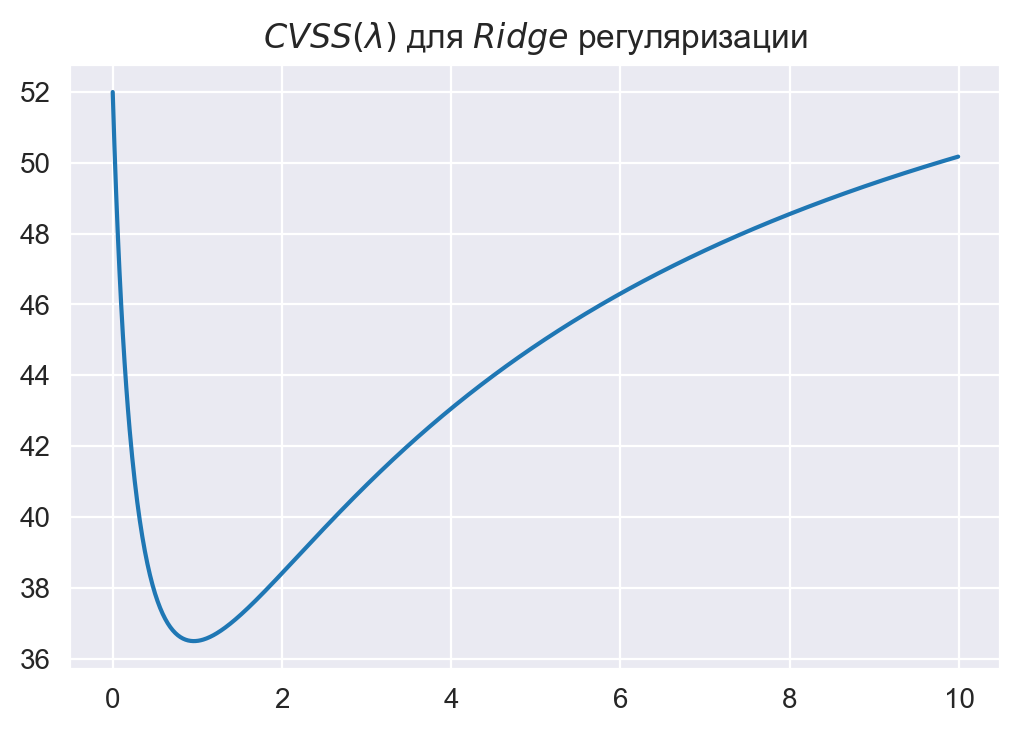

In [9]:
def ridge(x, Y_I, Y, L):
    e = Y - Y_I @ x
    return e.T @ e + L * np.sum(x ** 2)


Ls = np.arange(0, 10, 0.01)
CVSS = []

for L in Ls:
    cvss_i = []
    for i in range(len(Y)):
        Y_I_t = np.delete(Y_I, i, 0)
        Y_t = np.delete(Y, i, 0)
        
        y = minimize(ridge, np.array([0, 0]), args=(Y_I_t, Y_t ,L)).x
        e_t = Y[i] - Y_I_t @ y
        cvss_i.append(e_t.T @ e_t)
    CVSS.append(np.sum(cvss_i))

index = CVSS.index(min(CVSS))

fig, ax = plt.subplots(dpi=200)
ax.set_title("$CVSS(\lambda)$ для $Ridge$ регуляризации")
ax.grid(True, which='both')

ax.plot(Ls, CVSS)
print(Ls[index], minimize(ridge, np.array([0, 0]), args=(Y_I, Y, Ls[index])).x)

plt.show()

## Lasso регуляризация

1.5 [-3.91455684e-08  3.12503483e+00]


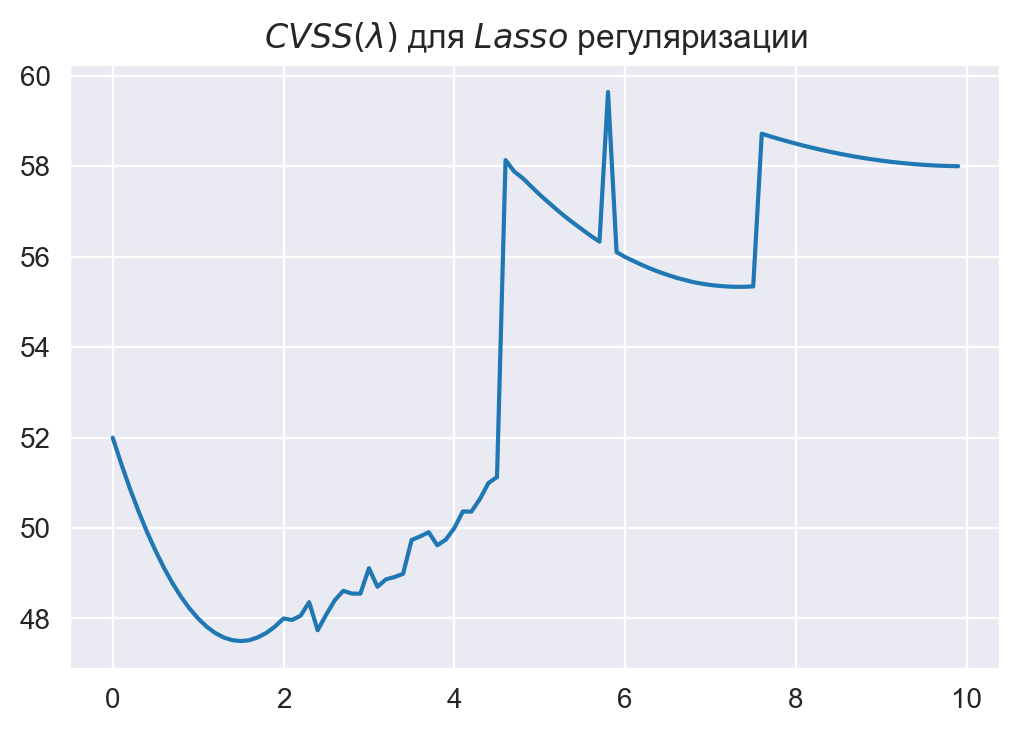

In [12]:
def lasso(x, Y_I, Y, L):
    e = Y - Y_I @ x
    return e.T @ e + L * np.sum(np.abs(x))

Ls = np.arange(0, 10, 0.1)
CVSS = []

for L in Ls:
    cvss_i = []
    for i in range(len(Y)):
        Y_I_t = np.delete(Y_I, i, 0)
        Y_t = np.delete(Y, i, 0)
        
        y = minimize(lasso, np.array([0, 0]), args=(Y_I_t, Y_t ,L), method='SLSQP').x
        e_t = Y[i] - Y_I_t @ y
        cvss_i.append(e_t.T @ e_t)
    CVSS.append(np.sum(cvss_i))

index = CVSS.index(min(CVSS))

fig, ax = plt.subplots(dpi=200)
ax.set_title("$CVSS(\lambda)$ для $Lasso$ регуляризации")
ax.grid(True, which='both')

ax.plot(Ls, CVSS)
print(Ls[index], minimize(lasso, np.array([0, 0]), args=(Y_I, Y, Ls[index]), method='SLSQP').x)

plt.show()